In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
import warnings
warnings.filterwarnings('ignore')

In [29]:
chicago = gp.read_file('processed_data/chicago_data.shp')

<AxesSubplot:>

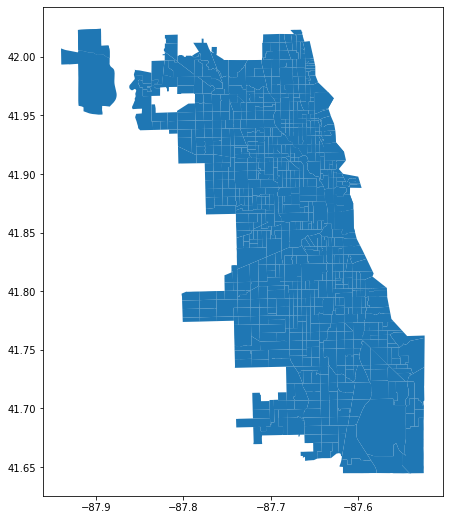

In [30]:
chicago.plot()

In [31]:
trees = gp.read_file('ChicagoTrees/SevenCensusWCommunity.shp')
trees.head()

,FID,AFFGEOID,VULNERABLE,FLOOD_SUSC,SURFACE_TE,AIR_TOXINS,PERCENT_CA,PRIORITY,RANK,VULRANK,COMMUNITY,Shape__Are,Shape__Len,geometry
0,1,1400000US17031010501,0.0215,8.613985,76.751724,2.935,20.31240,0.306373,High,High,Rogers Park,3.781367e+05,2675.945355,"POLYGON ((-87.66593 42.01279, -87.66346 42.012..."
1,2,1400000US17031020500,0.0532,4.554867,76.337500,2.702,28.66730,-0.184123,Low,Very high,West Ridge,1.398326e+06,4796.509025,"POLYGON ((-87.69008 42.00504, -87.68018 42.005..."
2,3,1400000US17031030400,0.0524,8.576603,80.003109,2.877,21.24230,0.455996,High,Very high,Edgewater,6.324892e+05,3387.448399,"POLYGON ((-87.67471 41.99077, -87.67003 41.990..."
3,4,1400000US17031031200,0.0427,8.272143,78.138462,3.494,7.75481,0.692479,Very high,High,Uptown,5.914187e+05,3269.391342,"POLYGON ((-87.65987 41.97633, -87.65879 41.976..."
4,5,1400000US17031040401,-0.0224,8.723268,80.370120,3.167,25.42520,0.455574,High,Medium,Lincoln Square,6.824266e+05,3684.852885,"POLYGON ((-87.68916 41.97590, -87.68674 41.975..."


<AxesSubplot:>

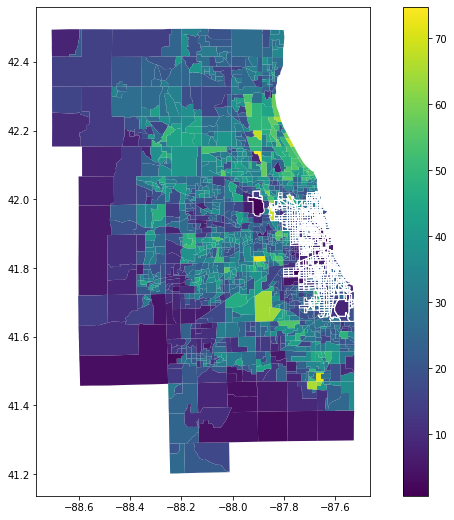

In [33]:
ax = trees.plot(column='PERCENT_CA', legend=True)
chicago.plot(ax=ax, edgecolor='w', lw=1, color='none')

In [37]:
strip = lambda s: int(s.split('1400000US')[1])

In [38]:
trees['geoid10'] = trees['AFFGEOID'].apply(strip)
trees[['AFFGEOID','geoid10', 'PERCENT_CA']]

,AFFGEOID,geoid10,PERCENT_CA
0,1400000US17031010501,17031010501,20.31240
1,1400000US17031020500,17031020500,28.66730
2,1400000US17031030400,17031030400,21.24230
3,1400000US17031031200,17031031200,7.75481
4,1400000US17031040401,17031040401,25.42520
...,...,...,...
1978,1400000US17089852201,17089852201,42.94510
1979,1400000US17031340500,17031340500,11.05190
1980,1400000US17093890700,17093890700,3.46777
1981,1400000US17097860103,17097860103,31.91760


In [39]:
chicago = chicago.merge(trees[['geoid10', 'PERCENT_CA']], on='geoid10', how='left')
chicago

,geoid10,commarea,commarea_n,H_a,H_amin,TOTAL POPU,crime_coun,is_violent,tract_area,pct_park,...,kw_total,existing_i,COMMUNITY,PERCENT OF,PERCENT HO,PERCENT AG,PER CAPITA,HARDSHIP I,geometry,PERCENT_CA
0,17031842400,44,44.0,0.691932,2.513031,3304,731,310,1.968638,0.028370,...,21308.75,2.0,Chatham,3.3,27.8,40.3,18881,60.0,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",14.3214
1,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,NaN,0.0,Chatham,3.3,27.8,40.3,18881,60.0,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",17.7488
2,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,7240.25,0.0,Chatham,3.3,27.8,40.3,18881,60.0,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",17.7488
3,17031440202,44,44.0,0.691932,2.513031,2999,383,152,0.781699,0.033547,...,9407.75,5.0,Chatham,3.3,27.8,40.3,18881,60.0,"POLYGON ((-87.60852 41.73660, -87.60875 41.736...",25.6669
4,17031440102,44,44.0,0.691932,2.513031,3127,547,241,0.627504,0.000000,...,8337.00,0.0,Chatham,3.3,27.8,40.3,18881,60.0,"POLYGON ((-87.59956 41.74540, -87.59890 41.745...",24.1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,17031120200,12,12.0,-0.996737,0.824363,4430,66,17,2.392156,0.020754,...,13873.50,4.0,Forest Glen,1.1,7.5,40.5,44164,11.0,"POLYGON ((-87.74884 41.98364, -87.74906 41.983...",46.9793
842,17031620300,62,62.0,0.580884,2.401983,6399,184,57,0.992183,0.050583,...,10158.25,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,"POLYGON ((-87.72310 41.79094, -87.72309 41.790...",15.1534
843,17031620400,62,62.0,0.580884,2.401983,5198,120,55,0.656283,0.006880,...,8237.75,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,"POLYGON ((-87.71312 41.78609, -87.71326 41.786...",13.1914
844,17031620100,62,62.0,0.580884,2.401983,4289,170,50,0.837580,0.000000,...,8694.75,1.0,West Elsdon,11.1,15.6,37.7,15754,69.0,"POLYGON ((-87.71347 41.79565, -87.71347 41.795...",13.5285


<AxesSubplot:>

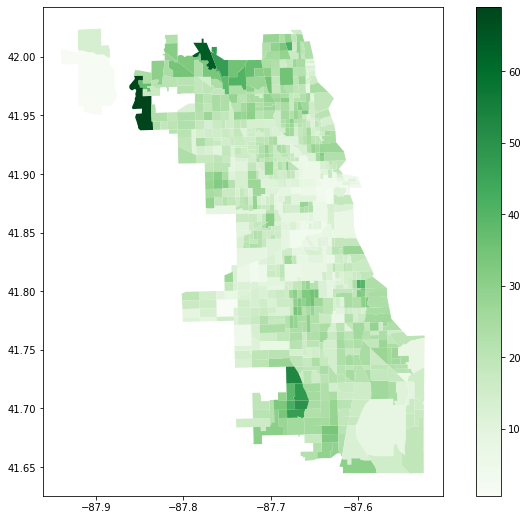

In [44]:
chicago.plot(column='PERCENT_CA', legend=True, cmap='Greens')

In [45]:
chicago['PERCENT_CA'] = chicago['PERCENT_CA']/chicago['PERCENT_CA'].max()

In [46]:
chicago.to_file('processed_data/chicago_data_v02.shp')